In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [3]:
labels = 'Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices'.split(',')
labels = np.array(labels)

In [4]:
preds = pickle.load(open('predictions', 'rb'))
hist = pickle.load(open('train_hist', 'rb'))

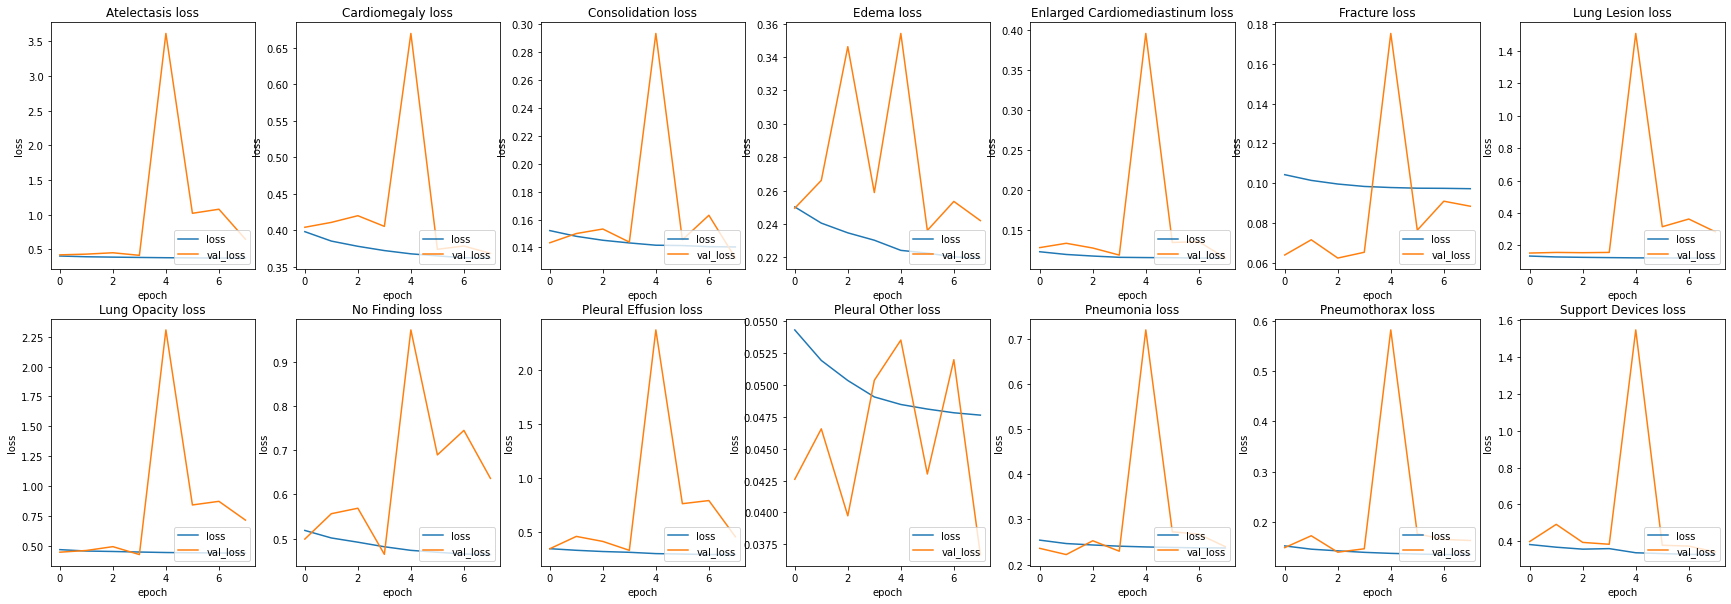

In [5]:
# Loss Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    loss = hist[f'dense_{str(i+1)}_loss']
    val_loss = hist[f'val_dense_{str(i+1)}_loss']
    title = f'{lab} loss'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(loss, label='loss')
    ax[x, y].plot(val_loss, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('loss')
    
    


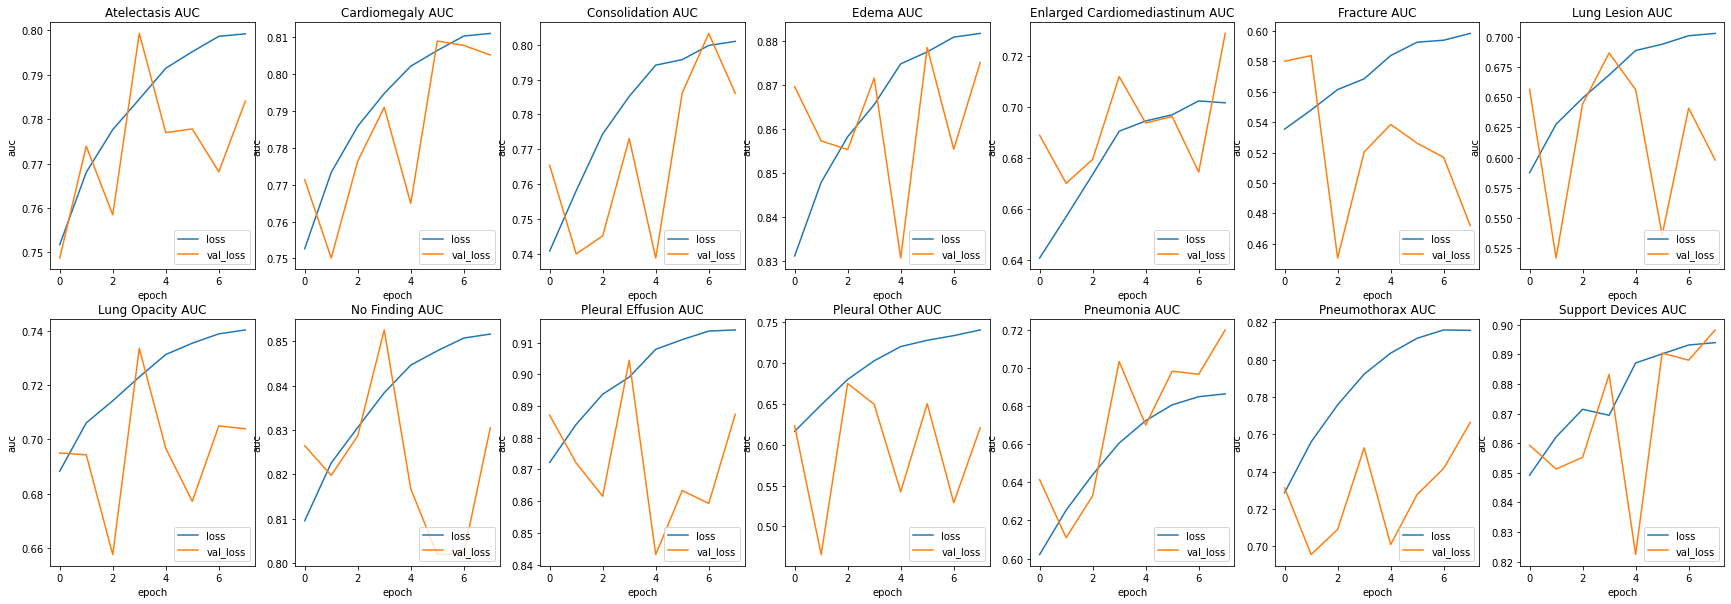

In [6]:
# Loss Plots
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(30, 10))
for i, lab in enumerate(labels):
    auc = hist[f'dense_{str(i+1)}_auc']
    val_auc = hist[f'val_dense_{str(i+1)}_auc']
    title = f'{lab} AUC'

    if i < 7:
        x = 0
    else:
        x = 1
    
    if i < 7:
        y = i
    else:
        y = i - 7

    ax[x, y].plot(auc, label='loss')
    ax[x, y].plot(val_auc, label='val_loss')
    ax[x, y].title.set_text(title)
    ax[x, y].legend(loc=4)
    ax[x, y].set_xlabel('epoch')
    ax[x, y].set_ylabel('auc')

In [7]:
preds = np.array(preds)

In [8]:
preds.shape

(14, 5159, 1)

In [9]:
shaped = preds.T[0]

In [10]:
shaped.shape

(5159, 14)

In [11]:
test = pd.read_csv('../../../../processed_splits/test.csv')

In [12]:
results = pd.DataFrame(shaped, columns=['pred_' + x for x in labels])

In [13]:
merged = pd.concat([test, results], axis=1)

In [14]:
fpr = {}
tpr = {}
auc = {}
for lab in labels:
    ytrue = merged[lab]
    ypred = merged['pred_'+lab]
    tfpr, ttpr, _ = roc_curve(ytrue, ypred)
    tauc = roc_auc_score(ytrue, ypred)
    fpr[lab] = tfpr
    tpr[lab] = ttpr
    auc[lab] = tauc


In [15]:
auc

{'Atelectasis': 0.7338020045718306,
 'Cardiomegaly': 0.7520824426821381,
 'Consolidation': 0.687045478490795,
 'Edema': 0.8057254580664382,
 'Enlarged Cardiomediastinum': 0.6176910667473281,
 'Fracture': 0.5670330013050822,
 'Lung Lesion': 0.6499589539345302,
 'Lung Opacity': 0.6508591327162682,
 'No Finding': 0.777740616328319,
 'Pleural Effusion': 0.869572350196704,
 'Pleural Other': 0.7179938642123516,
 'Pneumonia': 0.6134614766804006,
 'Pneumothorax': 0.7556635648609726,
 'Support Devices': 0.8472976635827636}

In [16]:
merged.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,pred_Enlarged Cardiomediastinum,pred_Fracture,pred_Lung Lesion,pred_Lung Opacity,pred_No Finding,pred_Pleural Effusion,pred_Pleural Other,pred_Pneumonia,pred_Pneumothorax,pred_Support Devices
0,10032725,50331901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.028591,0.017011,0.010158,0.117863,0.514910,0.024461,0.000972,0.033867,0.054003,0.674240
1,10032725,55504914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024768,0.015360,0.009065,0.067352,0.641565,0.009994,0.000774,0.021268,0.051336,0.690007
2,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014533,0.025803,0.029284,0.181185,0.421983,0.050918,0.005211,0.072171,0.019981,0.048930
3,10046166,50051329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023567,0.028461,0.029168,0.158798,0.422949,0.034958,0.006189,0.059293,0.029504,0.123027
4,10046166,51738740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018360,0.026041,0.029416,0.089340,0.603777,0.015223,0.006175,0.039030,0.016694,0.084055


In [18]:
for lab in labels:
    print(merged[lab].value_counts())

0.0    4125
1.0    1034
Name: Atelectasis, dtype: int64
0.0    3901
1.0    1258
Name: Cardiomegaly, dtype: int64
0.0    4833
1.0     326
Name: Consolidation, dtype: int64
0.0    4200
1.0     959
Name: Edema, dtype: int64
0.0    4959
1.0     200
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    4992
1.0     167
Name: Fracture, dtype: int64
0.0    4957
1.0     202
Name: Lung Lesion, dtype: int64
0.0    3598
1.0    1561
Name: Lung Opacity, dtype: int64
0.0    4175
1.0     984
Name: No Finding, dtype: int64
0.0    3617
1.0    1542
Name: Pleural Effusion, dtype: int64
0.0    5040
1.0     119
Name: Pleural Other, dtype: int64
0.0    4620
1.0     539
Name: Pneumonia, dtype: int64
0.0    5015
1.0     144
Name: Pneumothorax, dtype: int64
0.0    3702
1.0    1457
Name: Support Devices, dtype: int64


In [17]:
merged.to_csv('results.csv', index=False)

In [19]:
train = pd.read_csv('../../../../processed_splits/train.csv')

In [20]:
for lab in labels:
    print(train[lab].value_counts())

0.0    305460
1.0     63485
Name: Atelectasis, dtype: int64
0.0    306391
1.0     62554
Name: Cardiomegaly, dtype: int64
0.0    354709
1.0     14236
Name: Consolidation, dtype: int64
0.0    333666
1.0     35279
Name: Edema, dtype: int64
0.0    359193
1.0      9752
Name: Enlarged Cardiomediastinum, dtype: int64
0.0    361541
1.0      7404
Name: Fracture, dtype: int64
0.0    358455
1.0     10490
Name: Lung Lesion, dtype: int64
0.0    294643
1.0     74302
Name: Lung Opacity, dtype: int64
0.0    227706
1.0    141239
Name: No Finding, dtype: int64
0.0    294200
1.0     74745
Name: Pleural Effusion, dtype: int64
0.0    365626
1.0      3319
Name: Pleural Other, dtype: int64
0.0    343456
1.0     25489
Name: Pneumonia, dtype: int64
0.0    354944
1.0     14001
Name: Pneumothorax, dtype: int64
0.0    287055
1.0     81890
Name: Support Devices, dtype: int64
